In [1]:
# Import Library yang akan dibutuhkan dalam teks analitik
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 210 kB 4.2 MB/s 


In [3]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 4.0 MB/s 
     |████████████████████████████████| 280 kB 57.1 MB/s 
     |████████████████████████████████| 1.6 MB 45.6 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=520d6f66ce7942d4daabb20b82efcdb3c2a66592e056525205929ac9b0e9478e
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [4]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [5]:
# Download corpus nltk yang akan digunakan
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
from google.colab import files
# Upload File yang dibutuhkan, CSV dan Stopword
data_to_load = files.upload()

Saving Dataset_Hadith (1).csv to Dataset_Hadith (1).csv


In [7]:
df = pd.read_csv("Dataset_Hadith (1).csv")
df.head()

,No.,Bab,Hadits,LEN,Kelas,Class,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,8,3,"Iman memiliki lebih dari enam puluh cabang, da...",77,informasi,1,1,0,0
1,9,4,Seorang muslim adalah orang yang Kaum Muslimin...,419,larangan,2,0,1,0
2,11,6,"Kamu memberi makan, mengucapkan salam kepada o...",93,informasi,1,1,0,0
3,13,8,tidaklah beriman seorang dari kalian hingga ak...,100,informasi,1,1,0,0
4,16,10,Tanda iman adalah mencintai (kaum) Anshar dan ...,88,informasi,1,1,0,0


In [8]:
# melihat class apa saja yang ada
df.Kelas.unique()

array(['informasi', 'larangan', 'anjuran'], dtype=object)

In [9]:
df.Class.unique()

array([1, 2, 3])

Bisa dibilang:<br>
1: Informasi<br>
2: Larangan<br>
3: Anjuran

Text(0.5, 1.0, 'Dataset rating distribuition')

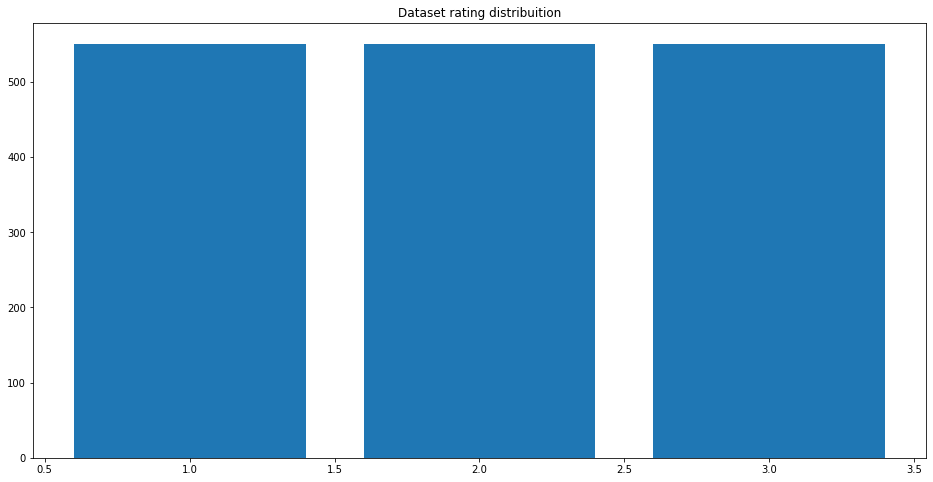

In [10]:
# visualisasi class yang ada
target_cnt = Counter(df.Class)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset rating distribuition")

In [11]:
# memilih kolom yang akan dipakai
df_ = df[['Hadits', 'Class']]
df_.head()

,Hadits,Class
0,"Iman memiliki lebih dari enam puluh cabang, da...",1
1,Seorang muslim adalah orang yang Kaum Muslimin...,2
2,"Kamu memberi makan, mengucapkan salam kepada o...",1
3,tidaklah beriman seorang dari kalian hingga ak...,1
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1


In [12]:
# melihat informasi dari data
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Hadits  1651 non-null   object
 1   Class   1651 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.9+ KB


In [13]:
# cek duplicated data
duplicates = df_[df_.duplicated()]
duplicates

,Hadits,Class
193,Janganlah kalian mengangkat kepala kalian hing...,2
229,kemudian memerintahkan orang-orang agar mereka...,1
261,Sesungguhnya ucapan tasbih buat laki-laki seda...,1
262,Janganlah kalian mengangkat kepala kalian hing...,2
280,Sesungguhnya sabar itu pada kesempatan pertama...,1
524,Nabi melarang menyongsong dagangan (diluar pas...,2
553,Jika seorang budak wanita berzina dan terbukti...,3
557,Siapa yang mempraktekkan salaf dalam jual beli...,3
565,"melarang uang hasil jual beli anjing, mahar se...",2
591,Sesungguhnya yang terbaik diantara kalian adal...,1


In [14]:
# drop duplicates data
df_ = df_.drop_duplicates(subset=['Hadits'])

## Lowercasting

In [15]:
# lowercasting
df_['lowercasting'] = df_['Hadits'].apply(lambda x: x.lower())
df_.head()

,Hadits,Class,lowercasting
0,"Iman memiliki lebih dari enam puluh cabang, da...",1,"iman memiliki lebih dari enam puluh cabang, da..."
1,Seorang muslim adalah orang yang Kaum Muslimin...,2,seorang muslim adalah orang yang kaum muslimin...
2,"Kamu memberi makan, mengucapkan salam kepada o...",1,"kamu memberi makan, mengucapkan salam kepada o..."
3,tidaklah beriman seorang dari kalian hingga ak...,1,tidaklah beriman seorang dari kalian hingga ak...
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1,tanda iman adalah mencintai (kaum) anshar dan ...


## Remove unwanted character

In [16]:
# menghilangkan unwanted chararter dan punctuation dengan regex

# menghilangkan format html
html_tag = re.compile(r'<.*?>')
# menghilangkan format URL
http_link = re.compile(r'https://\S+')
www_link = re.compile(r'www\.\S+')
# menghilangkan tanda baca
punct = re.compile(r"[^\w\s]")
# menghilangkan angka
number = re.compile(r"\d")
# menghilangkan double spasi
space = re.compile(r"\s\s+")

def clean_data(text):
    text = re.sub(html_tag, r"", text)
    text = re.sub(http_link, r"", text)
    text = re.sub(www_link, r"", text)
    text = re.sub(punct, r"", text)
    text = re.sub(number, r"", text)
    text = re.sub(space, r"", text)
    return text

In [17]:
df_['no_unwanted'] = df_['lowercasting'].apply(lambda x: clean_data(x))
df_.head()

,Hadits,Class,lowercasting,no_unwanted
0,"Iman memiliki lebih dari enam puluh cabang, da...",1,"iman memiliki lebih dari enam puluh cabang, da...",iman memiliki lebih dari enam puluh cabang dan...
1,Seorang muslim adalah orang yang Kaum Muslimin...,2,seorang muslim adalah orang yang kaum muslimin...,seorang muslim adalah orang yang kaum muslimin...
2,"Kamu memberi makan, mengucapkan salam kepada o...",1,"kamu memberi makan, mengucapkan salam kepada o...",kamu memberi makan mengucapkan salam kepada or...
3,tidaklah beriman seorang dari kalian hingga ak...,1,tidaklah beriman seorang dari kalian hingga ak...,tidaklah beriman seorang dari kalian hingga ak...
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1,tanda iman adalah mencintai (kaum) anshar dan ...,tanda iman adalah mencintai kaum anshar dan ta...


## Tokenization

In [18]:
# tokenization atau memecah kalimat jadi beberapa kata menggunakan NLTK

df_['token'] = df_['no_unwanted'].apply(lambda x: word_tokenize(x))
df_.head()

,Hadits,Class,lowercasting,no_unwanted,token
0,"Iman memiliki lebih dari enam puluh cabang, da...",1,"iman memiliki lebih dari enam puluh cabang, da...",iman memiliki lebih dari enam puluh cabang dan...,"[iman, memiliki, lebih, dari, enam, puluh, cab..."
1,Seorang muslim adalah orang yang Kaum Muslimin...,2,seorang muslim adalah orang yang kaum muslimin...,seorang muslim adalah orang yang kaum muslimin...,"[seorang, muslim, adalah, orang, yang, kaum, m..."
2,"Kamu memberi makan, mengucapkan salam kepada o...",1,"kamu memberi makan, mengucapkan salam kepada o...",kamu memberi makan mengucapkan salam kepada or...,"[kamu, memberi, makan, mengucapkan, salam, kep..."
3,tidaklah beriman seorang dari kalian hingga ak...,1,tidaklah beriman seorang dari kalian hingga ak...,tidaklah beriman seorang dari kalian hingga ak...,"[tidaklah, beriman, seorang, dari, kalian, hin..."
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1,tanda iman adalah mencintai (kaum) anshar dan ...,tanda iman adalah mencintai kaum anshar dan ta...,"[tanda, iman, adalah, mencintai, kaum, anshar,..."


## Stemming

In [19]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df_['token']:
  for term in document:
    if term not in term_dict:
      term_dict[term] = ''

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")

def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df_['Stem'] = df_['token'].swifter.apply(get_stemmed_term)
df_.head()

Streaming output truncated to the last 5000 lines.
kitab : kitab
ditulisqs : ditulisqs
thuur : thuur
penuhi : penuh
panggilanmu : panggil
setengah : tengah
hutangnya : hutang
dikhawatirkan : khawatir
shubuh : shubuh
witir : witir
penutup : tutup
shalatnya : shalatnya
sebelumnya : belum
jadikanlah : jadi
jarak : jarak
pembatas : batas
selebar : lebar
mimbar : mimbar
kirakira : kirakira
membatasinya : batas
dihadapannya : hadap
dicegah : cegah
mau : mau
perangilah : perang
setan : setan
membaiat : baiat
menunaikan : tunai
zakat : zakat
setia : setia
udara : udara
sangat : sangat
panas : panas
menyengat : sengat
tundalah : tunda
berasal : asal
hembusan : hembus
api : api
jahannam : jahannam
zhuhur : zhuhur
hingg : hingg
mereda : reda
dikuatkan : kuat
sufyan : sufyan
awanah : awanah
muadzin : muadzin
mengumandangkan : kumandang
adzan : adzan
bayangbayang : bayangbayang
maksud : maksud
firman : firman
tataqayyau : tataqayyau
qs : qs
nahladalah : nahladalah
condong : condong
ashar : ashar
se

Pandas Apply:   0%|          | 0/1626 [00:00<?, ?it/s]

,Hadits,Class,lowercasting,no_unwanted,token,Stem
0,"Iman memiliki lebih dari enam puluh cabang, da...",1,"iman memiliki lebih dari enam puluh cabang, da...",iman memiliki lebih dari enam puluh cabang dan...,"[iman, memiliki, lebih, dari, enam, puluh, cab...","[iman, milik, lebih, dari, enam, puluh, cabang..."
1,Seorang muslim adalah orang yang Kaum Muslimin...,2,seorang muslim adalah orang yang kaum muslimin...,seorang muslim adalah orang yang kaum muslimin...,"[seorang, muslim, adalah, orang, yang, kaum, m...","[orang, muslim, adalah, orang, yang, kaum, mus..."
2,"Kamu memberi makan, mengucapkan salam kepada o...",1,"kamu memberi makan, mengucapkan salam kepada o...",kamu memberi makan mengucapkan salam kepada or...,"[kamu, memberi, makan, mengucapkan, salam, kep...","[kamu, beri, makan, ucap, salam, kepada, orang..."
3,tidaklah beriman seorang dari kalian hingga ak...,1,tidaklah beriman seorang dari kalian hingga ak...,tidaklah beriman seorang dari kalian hingga ak...,"[tidaklah, beriman, seorang, dari, kalian, hin...","[tidak, iman, orang, dari, kalian, hingga, aku..."
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1,tanda iman adalah mencintai (kaum) anshar dan ...,tanda iman adalah mencintai kaum anshar dan ta...,"[tanda, iman, adalah, mencintai, kaum, anshar,...","[tanda, iman, adalah, cinta, kaum, anshar, dan..."


## Stopword removal

In [20]:
list_stopwords = stopwords.words('indonesian')

list_stopwords = set(list_stopwords)

def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df_['no_stopword'] = df_['Stem'].apply(stopwords_removal)
df_.head()

,Hadits,Class,lowercasting,no_unwanted,token,Stem,no_stopword
0,"Iman memiliki lebih dari enam puluh cabang, da...",1,"iman memiliki lebih dari enam puluh cabang, da...",iman memiliki lebih dari enam puluh cabang dan...,"[iman, memiliki, lebih, dari, enam, puluh, cab...","[iman, milik, lebih, dari, enam, puluh, cabang...","[iman, milik, enam, puluh, cabang, malu, iman]"
1,Seorang muslim adalah orang yang Kaum Muslimin...,2,seorang muslim adalah orang yang kaum muslimin...,seorang muslim adalah orang yang kaum muslimin...,"[seorang, muslim, adalah, orang, yang, kaum, m...","[orang, muslim, adalah, orang, yang, kaum, mus...","[orang, muslim, orang, kaum, muslimin, selamat..."
2,"Kamu memberi makan, mengucapkan salam kepada o...",1,"kamu memberi makan, mengucapkan salam kepada o...",kamu memberi makan mengucapkan salam kepada or...,"[kamu, memberi, makan, mengucapkan, salam, kep...","[kamu, beri, makan, ucap, salam, kepada, orang...","[makan, salam, orang, kenal, kenal]"
3,tidaklah beriman seorang dari kalian hingga ak...,1,tidaklah beriman seorang dari kalian hingga ak...,tidaklah beriman seorang dari kalian hingga ak...,"[tidaklah, beriman, seorang, dari, kalian, hin...","[tidak, iman, orang, dari, kalian, hingga, aku...","[iman, orang, cinta, orang, tua, anak]"
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1,tanda iman adalah mencintai (kaum) anshar dan ...,tanda iman adalah mencintai kaum anshar dan ta...,"[tanda, iman, adalah, mencintai, kaum, anshar,...","[tanda, iman, adalah, cinta, kaum, anshar, dan...","[tanda, iman, cinta, kaum, anshar, tanda, nifa..."


## Menggabungkan token dan save data

In [21]:
# Menggabungkan kata-kata menjadi satu kalimat utuh
df_['bersih'] = df_["no_stopword"].apply(lambda x: " ".join(x))
df_.head()

,Hadits,Class,lowercasting,no_unwanted,token,Stem,no_stopword,bersih
0,"Iman memiliki lebih dari enam puluh cabang, da...",1,"iman memiliki lebih dari enam puluh cabang, da...",iman memiliki lebih dari enam puluh cabang dan...,"[iman, memiliki, lebih, dari, enam, puluh, cab...","[iman, milik, lebih, dari, enam, puluh, cabang...","[iman, milik, enam, puluh, cabang, malu, iman]",iman milik enam puluh cabang malu iman
1,Seorang muslim adalah orang yang Kaum Muslimin...,2,seorang muslim adalah orang yang kaum muslimin...,seorang muslim adalah orang yang kaum muslimin...,"[seorang, muslim, adalah, orang, yang, kaum, m...","[orang, muslim, adalah, orang, yang, kaum, mus...","[orang, muslim, orang, kaum, muslimin, selamat...",orang muslim orang kaum muslimin selamat lisan...
2,"Kamu memberi makan, mengucapkan salam kepada o...",1,"kamu memberi makan, mengucapkan salam kepada o...",kamu memberi makan mengucapkan salam kepada or...,"[kamu, memberi, makan, mengucapkan, salam, kep...","[kamu, beri, makan, ucap, salam, kepada, orang...","[makan, salam, orang, kenal, kenal]",makan salam orang kenal kenal
3,tidaklah beriman seorang dari kalian hingga ak...,1,tidaklah beriman seorang dari kalian hingga ak...,tidaklah beriman seorang dari kalian hingga ak...,"[tidaklah, beriman, seorang, dari, kalian, hin...","[tidak, iman, orang, dari, kalian, hingga, aku...","[iman, orang, cinta, orang, tua, anak]",iman orang cinta orang tua anak
4,Tanda iman adalah mencintai (kaum) Anshar dan ...,1,tanda iman adalah mencintai (kaum) anshar dan ...,tanda iman adalah mencintai kaum anshar dan ta...,"[tanda, iman, adalah, mencintai, kaum, anshar,...","[tanda, iman, adalah, cinta, kaum, anshar, dan...","[tanda, iman, cinta, kaum, anshar, tanda, nifa...",tanda iman cinta kaum anshar tanda nifaq benci...


In [22]:
informasi = df_[df_['Class'] == 1]
larangan = df_[df_['Class'] == 2]
anjuran = df_[df_['Class'] == 3]

In [23]:
def count_word(df_, num):
    print('Class',df_['Class'].unique()[0])
    count_word = df_.bersih.str.split(expand=True).stack().value_counts()
    df_count_words = count_word.to_frame(name ='counts')
    df_count_words = df_count_words.reset_index().rename(columns={'index':'word'})
    return display(df_count_words.head(num))

In [24]:
for i in [informasi, larangan, anjuran]:
    count_word(i,5)

Class 1


,word,counts
0,orang,114
1,beliau,83
2,nabi,78
3,shalat,66
4,sungguh,57


Class 2


,word,counts
0,orang,474
1,larang,285
2,beliau,260
3,allah,249
4,nabi,235


Class 3


,word,counts
0,orang,247
1,beliau,183
2,allah,174
3,shalat,86
4,sungguh,79


In [25]:
df_stemdulu = df_[['no_stopword','bersih','Class']]
df_stemdulu.to_csv('/content/drive/MyDrive/PROPOSAL dan TA/code/hadis_preprocessed_stemdulu.csv', encoding='utf-8', index=False)